In [1]:
from faim_dl.data_record import DefaultDataRecord

from glob import glob
from os.path import join

import numpy as np

In [2]:
data_record = DefaultDataRecord(path='./dataset/', 
                       name="BBBC039",
                                spacing=(1.2, 1.2),
                                min_shape=(624, 836),
                                chunks=(624, 836),
                       tags=["2D"],
                       description=["Nuclei of U2OS cells in a chemical screen"],
                       documentation="https://bbbc.broadinstitute.org/BBBC039",
                       authors={
                           "name": "Tim-Oliver Buchholz",
                           "affiliation": "FMI for Biomedical Research, Basel"
                       },
                       cite=[
                           {
                               "text": "Annotated high-throughput microscopy image sets for validation",
                               "doi": "10.1038/nmeth.2083",
                               "url": "https://www.nature.com/articles/nmeth.2083"
                           }
                       ],
                       license="CC0 1.0 Universal (CC0 1.0) - Public Domain Dedication ")

In [3]:
with open('/home/tibuch/Data/broad/nuclei_U2OS/metadata/metadata/training.txt', 'r') as f:
    train_files = f.read().replace('.png', '.tif').split('\n')
    train_files = train_files[:-1]
    
with open('/home/tibuch/Data/broad/nuclei_U2OS/metadata/metadata/validation.txt', 'r') as f:
    val_files = f.read().replace('.png', '.tif').split('\n')
    val_files = val_files[:-1]
    
with open('/home/tibuch/Data/broad/nuclei_U2OS/metadata/metadata/test.txt', 'r') as f:
    test_files = f.read().replace('.png', '.tif').split('\n')
    test_files = test_files[:-1]

In [4]:
train_src_files = [join('/home/tibuch/Data/broad/nuclei_U2OS/images/', f) for f in train_files]
train_trg_files = [join('/home/tibuch/Data/broad/nuclei_U2OS/masks/', f) for f in train_files]

val_src_files = [join('/home/tibuch/Data/broad/nuclei_U2OS/images/', f) for f in val_files]
val_trg_files = [join('/home/tibuch/Data/broad/nuclei_U2OS/masks/', f) for f in val_files]

test_src_files = [join('/home/tibuch/Data/broad/nuclei_U2OS/images/', f) for f in test_files]
test_trg_files = [join('/home/tibuch/Data/broad/nuclei_U2OS/masks/', f) for f in test_files]

In [5]:
data_record.add_train_data(
    source_files=train_src_files[:20],
    target_files=train_trg_files[:20],
    axes=("y", "x"),
    data_spacing=(1., 1.),
    source_dtype=np.float32,
    target_dtype=np.int16
)

In [6]:
data_record.add_train_data(
    source_files=train_src_files[20:],
    target_files=train_trg_files[20:],
    axes=("y", "x"),
    data_spacing=(1, 1),
    source_dtype=np.float32,
    target_dtype=np.int16
)

In [7]:
data_record.add_val_data(
    source_files=val_src_files,
    target_files=val_trg_files,
    axes=("y", "x"),
    data_spacing=(1, 1),
    source_dtype=np.float32,
    target_dtype=np.int16
)

In [8]:
data_record.add_test_data(
    source_files=test_src_files,
    target_files=test_trg_files,
    axes=("y", "x"),
    data_spacing=(1, 1),
    source_dtype=np.float32,
    target_dtype=np.int16
)

In [9]:
data_record.serialize()

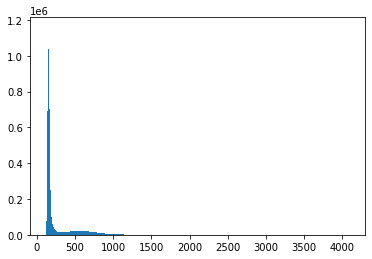

In [10]:
data_record.histograms['train_data'].plot()

In [2]:
dr = DefaultDataRecord.deserialize('./dataset/BBBC039.zarr/BBBC039_rdf.json')

In [3]:
dr.attachments

{'train_data': {'data': './train_data', 'histogram': './train_data_hist.npz'},
 'val_data': {'data': './val_data', 'histogram': './val_data_hist.npz'},
 'test_data': {'data': './test_data', 'histogram': './test_data_hist.npz'}}

In [4]:
dr.dir

'./dataset/BBBC039.zarr'

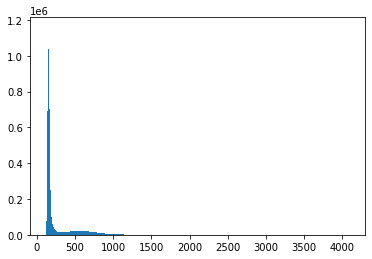

In [5]:
dr.histograms['train_data'].plot()

In [6]:
print(dr.histograms['train_data'].quantile(0.03), dr.histograms['train_data'].quantile(0.998))

137 1377


In [7]:
dr.target_spacing

(1.2, 1.2)

In [8]:
dr.min_shape

(624, 836)

In [9]:
dr.chunks

(624, 836)